In [206]:
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_auc_score, f1_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as sm
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings("ignore")

In [185]:
df_final = pd.read_csv('recent_performance.csv')

In [186]:
df_final=df_final.drop(labels=['Unnamed: 0','AWAY_TEAM_ABBREVIATION','HOME_TEAM_ABBREVIATION'],axis=1)

In [187]:
df_final=df_final.drop(labels=['GAME_ID'],axis=1)

In [188]:
df_final2=df_final.drop(labels=['A_Last_10_Avg_OREB_PCT','A_Last_10_Avg_DREB_PCT','A_Last_10_Avg_REB_PCT','H_Last_10_Avg_OREB_PCT',
                                'H_Last_10_Avg_DREB_PCT','H_Last_10_Avg_REB_PCT','H_Last_10_Avg_PTS','H_Last_10_Avg_PLUS_MINUS',
                                'A_Last_10_Avg_PTS','A_Last_10_Avg_PLUS_MINUS'],axis=1)

In [189]:
df = pd.read_csv('final.csv')

In [190]:
df_final2

,H_Team_Elo_Before,A_Team_Elo_Before,H_Last_10_Avg_STL,H_Last_10_Avg_BLK,H_Last_10_Avg_PF,H_Last_10_Avg_OFF_RATING,H_Last_10_Avg_DEF_RATING,H_Last_10_Avg_AST_TOV,H_Last_10_Avg_AST_RATIO,H_Last_10_Avg_TM_TOV_PCT,...,A_Last_10_Avg_BLK,A_Last_10_Avg_PF,A_Last_10_Avg_OFF_RATING,A_Last_10_Avg_DEF_RATING,A_Last_10_Avg_AST_TOV,A_Last_10_Avg_AST_RATIO,A_Last_10_Avg_TM_TOV_PCT,A_Last_10_Avg_TS_PCT,A_Last_10_Avg_PACE,A_Last_10_Avg_PIE
0,1500.000000,1500.000000,12.0,5.0,22.0,115.80,87.10,2.070,20.90,14.90,...,6.0,22.0,87.10,115.80,0.940,13.00,17.80,0.4590,101.000,0.2970
1,1500.000000,1500.000000,5.0,3.0,18.0,122.80,114.30,1.690,18.40,14.10,...,5.0,19.0,114.30,122.80,1.360,15.60,15.40,0.5840,91.500,0.4520
2,1500.000000,1500.000000,11.0,6.0,19.0,99.00,129.00,1.500,18.10,15.80,...,3.0,19.0,129.00,99.00,1.790,16.80,14.00,0.5890,100.500,0.6000
3,1500.000000,1500.000000,10.0,4.0,24.0,112.90,118.80,1.930,20.40,14.90,...,1.0,23.0,118.80,112.90,1.310,15.50,15.80,0.6080,101.000,0.4970
4,1500.000000,1500.000000,6.0,3.0,29.0,96.90,116.50,1.110,15.80,18.60,...,5.0,20.0,116.50,96.90,1.710,17.70,14.40,0.5800,97.000,0.6170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,1506.607511,1610.871051,10.0,3.5,17.2,121.36,113.29,2.035,20.71,15.33,...,3.8,23.4,108.26,115.68,1.683,16.69,14.08,0.5589,98.600,0.4539
7055,1306.280083,1642.152228,6.8,4.8,19.4,112.15,111.93,2.106,18.26,12.60,...,4.2,18.9,115.73,109.73,2.149,18.25,14.38,0.5757,96.805,0.5185
7056,1595.539673,1382.558218,6.5,3.9,18.6,110.01,106.12,2.104,18.78,12.32,...,2.7,20.1,117.59,115.00,2.089,19.31,13.91,0.6125,96.600,0.5205
7057,1686.415379,1356.545289,8.0,4.4,17.4,116.90,110.24,2.214,19.81,12.88,...,3.0,18.2,120.75,114.84,2.218,18.57,12.04,0.6225,96.100,0.5450


In [191]:
#x = df_final2
x=df_final2
y = df['HomeWin']
z=pd.concat([x,y],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [192]:
z

,H_Team_Elo_Before,A_Team_Elo_Before,H_Last_10_Avg_STL,H_Last_10_Avg_BLK,H_Last_10_Avg_PF,H_Last_10_Avg_OFF_RATING,H_Last_10_Avg_DEF_RATING,H_Last_10_Avg_AST_TOV,H_Last_10_Avg_AST_RATIO,H_Last_10_Avg_TM_TOV_PCT,...,A_Last_10_Avg_PF,A_Last_10_Avg_OFF_RATING,A_Last_10_Avg_DEF_RATING,A_Last_10_Avg_AST_TOV,A_Last_10_Avg_AST_RATIO,A_Last_10_Avg_TM_TOV_PCT,A_Last_10_Avg_TS_PCT,A_Last_10_Avg_PACE,A_Last_10_Avg_PIE,HomeWin
0,1500.000000,1500.000000,12.0,5.0,22.0,115.80,87.10,2.070,20.90,14.90,...,22.0,87.10,115.80,0.940,13.00,17.80,0.4590,101.000,0.2970,1
1,1500.000000,1500.000000,5.0,3.0,18.0,122.80,114.30,1.690,18.40,14.10,...,19.0,114.30,122.80,1.360,15.60,15.40,0.5840,91.500,0.4520,1
2,1500.000000,1500.000000,11.0,6.0,19.0,99.00,129.00,1.500,18.10,15.80,...,19.0,129.00,99.00,1.790,16.80,14.00,0.5890,100.500,0.6000,0
3,1500.000000,1500.000000,10.0,4.0,24.0,112.90,118.80,1.930,20.40,14.90,...,23.0,118.80,112.90,1.310,15.50,15.80,0.6080,101.000,0.4970,0
4,1500.000000,1500.000000,6.0,3.0,29.0,96.90,116.50,1.110,15.80,18.60,...,20.0,116.50,96.90,1.710,17.70,14.40,0.5800,97.000,0.6170,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,1506.607511,1610.871051,10.0,3.5,17.2,121.36,113.29,2.035,20.71,15.33,...,23.4,108.26,115.68,1.683,16.69,14.08,0.5589,98.600,0.4539,1
7055,1306.280083,1642.152228,6.8,4.8,19.4,112.15,111.93,2.106,18.26,12.60,...,18.9,115.73,109.73,2.149,18.25,14.38,0.5757,96.805,0.5185,1
7056,1595.539673,1382.558218,6.5,3.9,18.6,110.01,106.12,2.104,18.78,12.32,...,20.1,117.59,115.00,2.089,19.31,13.91,0.6125,96.600,0.5205,1
7057,1686.415379,1356.545289,8.0,4.4,17.4,116.90,110.24,2.214,19.81,12.88,...,18.2,120.75,114.84,2.218,18.57,12.04,0.6225,96.100,0.5450,0


In [193]:
a=df_final2.iloc[:,2:]
a

,H_Last_10_Avg_STL,H_Last_10_Avg_BLK,H_Last_10_Avg_PF,H_Last_10_Avg_OFF_RATING,H_Last_10_Avg_DEF_RATING,H_Last_10_Avg_AST_TOV,H_Last_10_Avg_AST_RATIO,H_Last_10_Avg_TM_TOV_PCT,H_Last_10_Avg_TS_PCT,H_Last_10_Avg_PACE,...,A_Last_10_Avg_BLK,A_Last_10_Avg_PF,A_Last_10_Avg_OFF_RATING,A_Last_10_Avg_DEF_RATING,A_Last_10_Avg_AST_TOV,A_Last_10_Avg_AST_RATIO,A_Last_10_Avg_TM_TOV_PCT,A_Last_10_Avg_TS_PCT,A_Last_10_Avg_PACE,A_Last_10_Avg_PIE
0,12.0,5.0,22.0,115.80,87.10,2.070,20.90,14.90,0.5720,101.000,...,6.0,22.0,87.10,115.80,0.940,13.00,17.80,0.4590,101.000,0.2970
1,5.0,3.0,18.0,122.80,114.30,1.690,18.40,14.10,0.6670,91.500,...,5.0,19.0,114.30,122.80,1.360,15.60,15.40,0.5840,91.500,0.4520
2,11.0,6.0,19.0,99.00,129.00,1.500,18.10,15.80,0.5380,100.500,...,3.0,19.0,129.00,99.00,1.790,16.80,14.00,0.5890,100.500,0.6000
3,10.0,4.0,24.0,112.90,118.80,1.930,20.40,14.90,0.5820,101.000,...,1.0,23.0,118.80,112.90,1.310,15.50,15.80,0.6080,101.000,0.4970
4,6.0,3.0,29.0,96.90,116.50,1.110,15.80,18.60,0.5290,97.000,...,5.0,20.0,116.50,96.90,1.710,17.70,14.40,0.5800,97.000,0.6170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,10.0,3.5,17.2,121.36,113.29,2.035,20.71,15.33,0.6180,97.200,...,3.8,23.4,108.26,115.68,1.683,16.69,14.08,0.5589,98.600,0.4539
7055,6.8,4.8,19.4,112.15,111.93,2.106,18.26,12.60,0.5663,95.550,...,4.2,18.9,115.73,109.73,2.149,18.25,14.38,0.5757,96.805,0.5185
7056,6.5,3.9,18.6,110.01,106.12,2.104,18.78,12.32,0.5647,99.345,...,2.7,20.1,117.59,115.00,2.089,19.31,13.91,0.6125,96.600,0.5205
7057,8.0,4.4,17.4,116.90,110.24,2.214,19.81,12.88,0.5828,99.300,...,3.0,18.2,120.75,114.84,2.218,18.57,12.04,0.6225,96.100,0.5450


In [194]:
x

,H_Team_Elo_Before,A_Team_Elo_Before,H_Last_10_Avg_STL,H_Last_10_Avg_BLK,H_Last_10_Avg_PF,H_Last_10_Avg_OFF_RATING,H_Last_10_Avg_DEF_RATING,H_Last_10_Avg_AST_TOV,H_Last_10_Avg_AST_RATIO,H_Last_10_Avg_TM_TOV_PCT,...,A_Last_10_Avg_BLK,A_Last_10_Avg_PF,A_Last_10_Avg_OFF_RATING,A_Last_10_Avg_DEF_RATING,A_Last_10_Avg_AST_TOV,A_Last_10_Avg_AST_RATIO,A_Last_10_Avg_TM_TOV_PCT,A_Last_10_Avg_TS_PCT,A_Last_10_Avg_PACE,A_Last_10_Avg_PIE
0,1500.000000,1500.000000,12.0,5.0,22.0,115.80,87.10,2.070,20.90,14.90,...,6.0,22.0,87.10,115.80,0.940,13.00,17.80,0.4590,101.000,0.2970
1,1500.000000,1500.000000,5.0,3.0,18.0,122.80,114.30,1.690,18.40,14.10,...,5.0,19.0,114.30,122.80,1.360,15.60,15.40,0.5840,91.500,0.4520
2,1500.000000,1500.000000,11.0,6.0,19.0,99.00,129.00,1.500,18.10,15.80,...,3.0,19.0,129.00,99.00,1.790,16.80,14.00,0.5890,100.500,0.6000
3,1500.000000,1500.000000,10.0,4.0,24.0,112.90,118.80,1.930,20.40,14.90,...,1.0,23.0,118.80,112.90,1.310,15.50,15.80,0.6080,101.000,0.4970
4,1500.000000,1500.000000,6.0,3.0,29.0,96.90,116.50,1.110,15.80,18.60,...,5.0,20.0,116.50,96.90,1.710,17.70,14.40,0.5800,97.000,0.6170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,1506.607511,1610.871051,10.0,3.5,17.2,121.36,113.29,2.035,20.71,15.33,...,3.8,23.4,108.26,115.68,1.683,16.69,14.08,0.5589,98.600,0.4539
7055,1306.280083,1642.152228,6.8,4.8,19.4,112.15,111.93,2.106,18.26,12.60,...,4.2,18.9,115.73,109.73,2.149,18.25,14.38,0.5757,96.805,0.5185
7056,1595.539673,1382.558218,6.5,3.9,18.6,110.01,106.12,2.104,18.78,12.32,...,2.7,20.1,117.59,115.00,2.089,19.31,13.91,0.6125,96.600,0.5205
7057,1686.415379,1356.545289,8.0,4.4,17.4,116.90,110.24,2.214,19.81,12.88,...,3.0,18.2,120.75,114.84,2.218,18.57,12.04,0.6225,96.100,0.5450


In [195]:
x.mean()

H_Team_Elo_Before           1503.814330
A_Team_Elo_Before           1502.106927
H_Last_10_Avg_STL              7.677524
H_Last_10_Avg_BLK              4.851932
H_Last_10_Avg_PF              20.180208
H_Last_10_Avg_OFF_RATING     109.538866
H_Last_10_Avg_DEF_RATING     109.568302
H_Last_10_Avg_AST_TOV          1.846835
H_Last_10_Avg_AST_RATIO       17.561540
H_Last_10_Avg_TM_TOV_PCT      14.188955
H_Last_10_Avg_TS_PCT           0.561793
H_Last_10_Avg_PACE            99.231212
H_Last_10_Avg_PIE              0.499730
A_Last_10_Avg_STL              7.666630
A_Last_10_Avg_BLK              4.877203
A_Last_10_Avg_PF              20.212283
A_Last_10_Avg_OFF_RATING     109.520065
A_Last_10_Avg_DEF_RATING     109.476655
A_Last_10_Avg_AST_TOV          1.850386
A_Last_10_Avg_AST_RATIO       17.531947
A_Last_10_Avg_TM_TOV_PCT      14.148049
A_Last_10_Avg_TS_PCT           0.561363
A_Last_10_Avg_PACE            99.248392
A_Last_10_Avg_PIE              0.500335
dtype: float64

In [196]:
def run_exps(X_train, y_train, X_test, y_test) :
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
        ]
    
    results = []
    
    names = []
    
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    
    target_names = ['win', 'loss']
    
    for name, model in models:
        
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        results.append(cv_results)
        names.append(name)
        
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        
    final = pd.concat(dfs, ignore_index=True)
    
    return final
final = run_exps(X_train, y_train, X_test, y_test)
final

LogReg
              precision    recall  f1-score   support

         win       0.64      0.61      0.62      1073
        loss       0.62      0.64      0.63      1045

    accuracy                           0.63      2118
   macro avg       0.63      0.63      0.63      2118
weighted avg       0.63      0.63      0.63      2118

RF
              precision    recall  f1-score   support

         win       0.64      0.61      0.63      1073
        loss       0.62      0.64      0.63      1045

    accuracy                           0.63      2118
   macro avg       0.63      0.63      0.63      2118
weighted avg       0.63      0.63      0.63      2118

KNN
              precision    recall  f1-score   support

         win       0.60      0.57      0.58      1073
        loss       0.58      0.61      0.59      1045

    accuracy                           0.59      2118
   macro avg       0.59      0.59      0.59      2118
weighted avg       0.59      0.59      0.59      2118

SVM
 

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.045438,0.008000,0.641052,0.641198,0.641052,0.639789,0.686438,LogReg
1,0.040792,0.006000,0.629555,0.630298,0.629555,0.629761,0.674781,LogReg
2,0.080722,0.009117,0.644737,0.644592,0.644737,0.644632,0.677916,LogReg
3,0.045552,0.006999,0.643725,0.644188,0.643725,0.643438,0.701626,LogReg
4,0.044953,0.013002,0.622470,0.624007,0.622470,0.622456,0.672595,LogReg
5,1.744143,0.077041,0.604651,0.604361,0.604651,0.603358,0.640820,RF
6,1.392902,0.089263,0.613360,0.614224,0.613360,0.613589,0.663770,RF
7,1.432334,0.053462,0.634615,0.635208,0.634615,0.634724,0.670142,RF
8,1.276821,0.044978,0.632591,0.633260,0.632591,0.632129,0.666947,RF
9,1.625769,0.068407,0.609312,0.610223,0.609312,0.609408,0.639126,RF


In [197]:
x = df_final2
y = df['HomeWin']
train_X, test_X, train_y, test_y = train_test_split(x, y, random_state=1, shuffle=True)

In [198]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(5,5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

ROC Score: 0.6319017971577322, F1 score: 0.6335963923337092 and Accuracy Score: 0.6317280453257791.


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

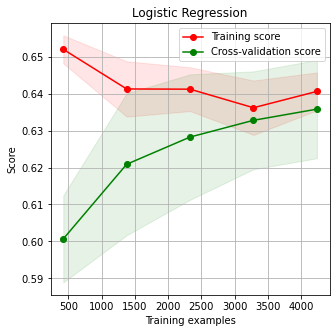

In [207]:
model1 = LogisticRegression(random_state=0)
model1.fit(train_X, train_y)
preds1 = model1.predict(test_X)

roc_1 = roc_auc_score(test_y, preds1)
f1_1 = f1_score(test_y, preds1)
score_1 = model1.score(test_X, test_y)

print(f'ROC Score: {roc_1}, F1 score: {f1_1} and Accuracy Score: {score_1}.')

plot_learning_curve(model1, 'Logistic Regression', train_X, train_y)

ROC Score: 0.6370239663838784, F1 score: 0.6392796848621273 and Accuracy Score: 0.6368271954674221


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

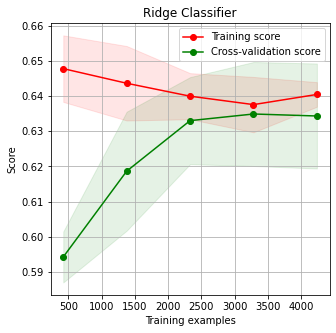

In [176]:
model2 = RidgeClassifierCV()
model2.fit(train_X, train_y)
preds2 = model2.predict(test_X)

roc_2 = roc_auc_score(test_y, preds2)
f1_2 = f1_score(test_y, preds2)
score_2 = model2.score(test_X, test_y)

print(f'ROC Score: {roc_2}, F1 score: {f1_2} and Accuracy Score: {score_2}')

plot_learning_curve(model2, 'Ridge Classifier', train_X, train_y)

ROC Score: 0.6318722597646769, F1 Score: 0.6327683615819208 and Accuracy Score: 0.6317280453257791


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

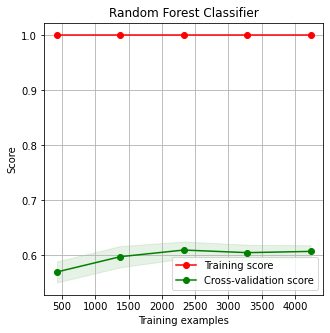

In [200]:
model7 = RandomForestClassifier(random_state=0)
model7.fit(train_X, train_y)
preds7 = model7.predict(test_X)

roc_7 = roc_auc_score(test_y, preds7)
f1_7 = f1_score(test_y, preds7)
score_7 = model7.score(test_X, test_y)

print(f'ROC Score: {roc_7}, F1 Score: {f1_7} and Accuracy Score: {score_7}')

plot_learning_curve(model7, 'Random Forest Classifier', train_X, train_y
                   )

ROC Score: 0.6189496503029509, F1 Score: 0.62296918767507 and Accuracy Score: 0.6186968838526912


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

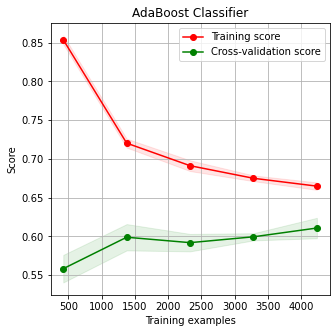

In [201]:
model8 = AdaBoostClassifier(random_state=0)
model8.fit(train_X, train_y)
preds8 = model8.predict(test_X)

roc_8 = roc_auc_score(test_y, preds8)
f1_8 = f1_score(test_y, preds8)
score_8 = model8.score(test_X, test_y)

print(f'ROC Score: {roc_8}, F1 Score: {f1_8} and Accuracy Score: {score_8}')

plot_learning_curve(model8, 'AdaBoost Classifier', train_X, train_y)

ROC Score: 0.6208194957068041, F1 Score: 0.629424778761062 and Accuracy Score: 0.6203966005665722


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

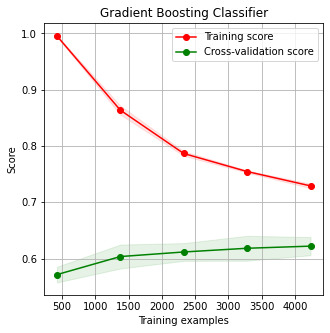

In [202]:
model9 = GradientBoostingClassifier(random_state=0)
model9.fit(train_X, train_y)
preds9 = model9.predict(test_X)

roc_9 = roc_auc_score(test_y, preds9)
f1_9 = f1_score(test_y, preds9)
score_9 = model9.score(test_X, test_y)

print(f'ROC Score: {roc_9}, F1 Score: {f1_9} and Accuracy Score: {score_9}')

plot_learning_curve(model9, 'Gradient Boosting Classifier', train_X, train_y)